In [1]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=40385828ebe9bbb3721fc7238d5347d12ddb08159e4558a151487192c70015b3
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [4]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    print(f"Most probable result: {max(counts, key=counts.get)}")
    display(plot_histogram(counts, title=f"QPE Result (n={num_count_qubits}, theta={theta})"))
    print(qc.draw(output='text'))

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
Most probable result: 001


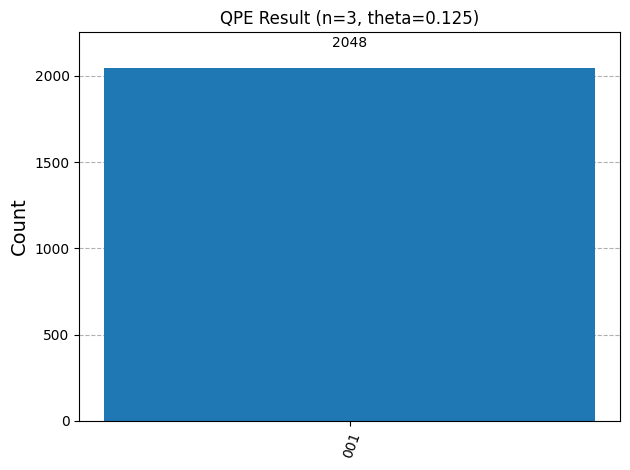

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

In [5]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

# ***TASK 1***

Most probable result: 010


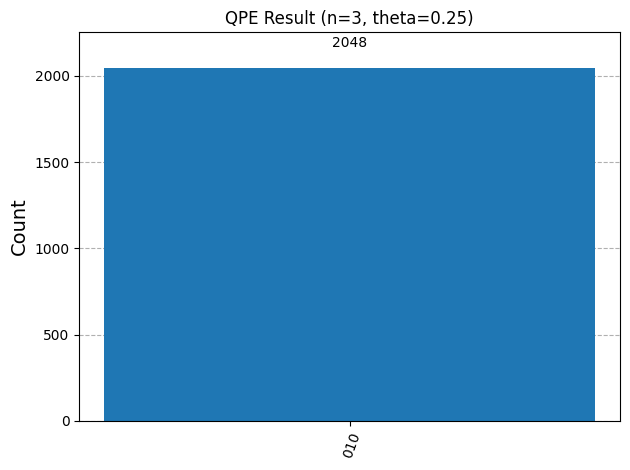

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

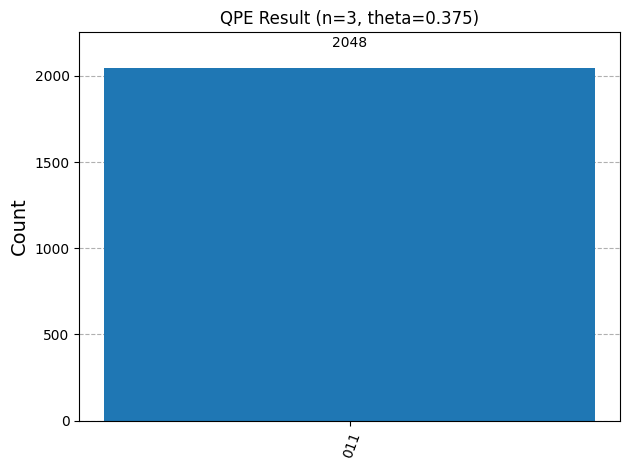

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

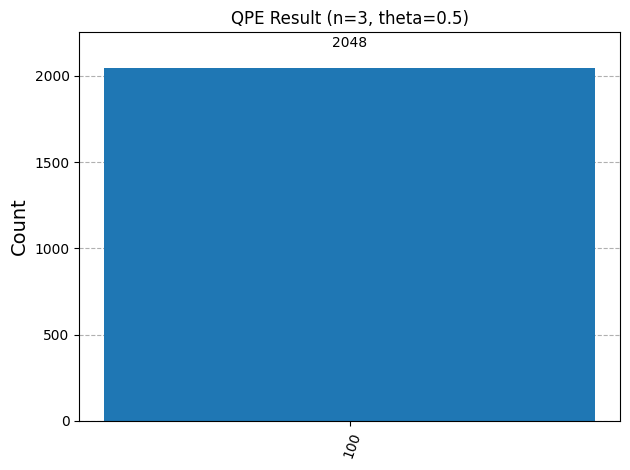

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2: ┤ H ├─╫─┤M├
«

In [6]:
# Theta = 0.25 (1/4). With n=3, expected result is 0.25 * 2^3 = 2 -> '010'
run_qpe(num_count_qubits=3, theta=0.25)

# Theta = 0.375 (3/8). With n=3, expected result is 0.375 * 2^3 = 3 -> '011'
run_qpe(num_count_qubits=3, theta=0.375)

# Theta = 0.5 (1/2). With n=3, expected result is 0.5 * 2^3 = 4 -> '100'
run_qpe(num_count_qubits=3, theta=0.5)

# ***TASK 2***

Most probable result: 0010


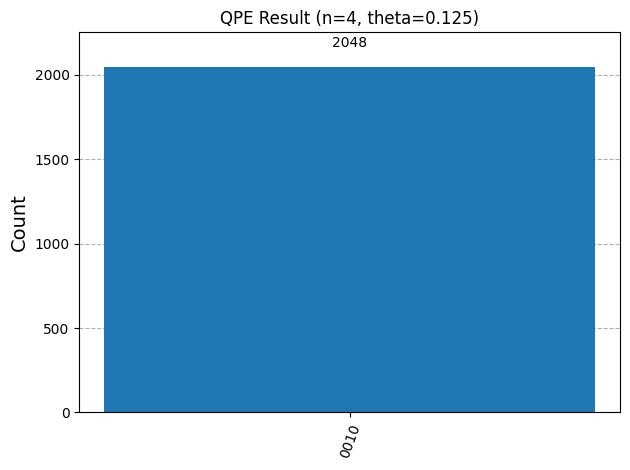

     ┌───┐                                    ┌───┐                         »
q_0: ┤ H ├─■────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼────────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │        │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼────────┼────────■────────X─────┼──────────────────────■────────»
     ├───┤ │        │        │              │                               »
q_3: ┤ H ├─┼────────┼────────┼──────■───────X───────────────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)                                  »
q_4: ┤ X ├─■────────■────────■──────■───────────────────────────────────────»
     └───┘                                                                  »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

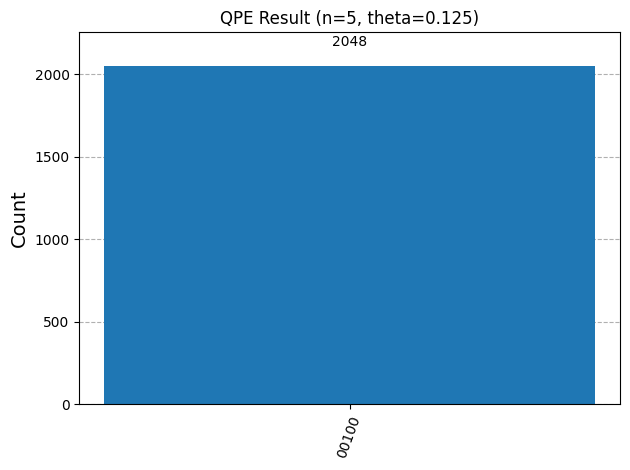

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                                                »
c: 5/═══════

In [7]:
# n = 4. With theta=0.125, expected result is 0.125 * 2^4 = 2 -> '0010'
run_qpe(num_count_qubits=4, theta=0.125)

# n = 5. With theta=0.125, expected result is 0.125 * 2^5 = 4 -> '00100'
run_qpe(num_count_qubits=5, theta=0.125)

# ***TASK 3***

Task 3: Comparison for n=4, theta=0.375
Theoretical Phase (theta): 0.375
Expected Measurement (M = theta * 2^n): 6.0000
Nearest Integer (M): 6
Expected Binary Output: '0110'

--- Simulation Results ---


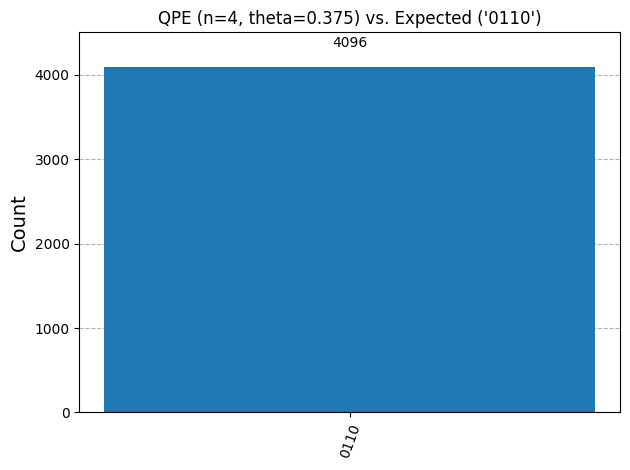

Task 3: Comparison for n=4, theta=0.3
Theoretical Phase (theta): 0.3
Expected Measurement (M = theta * 2^n): 4.8000
Nearest Integer (M): 5
Expected Binary Output: '0101'

--- Simulation Results ---


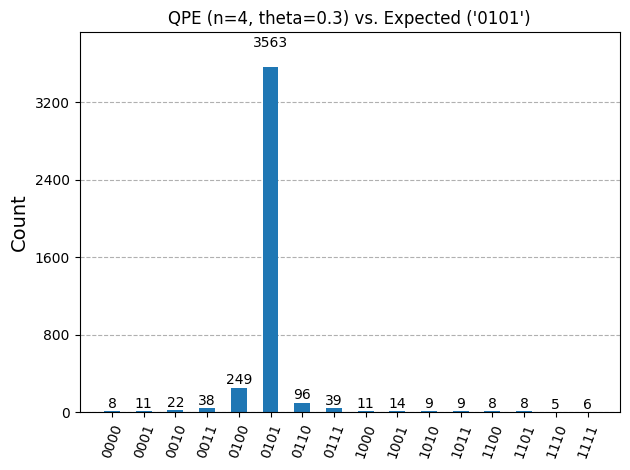

In [8]:
def run_qpe_with_comparison(num_count_qubits_comp, theta_comp):
    """
    Runs QPE and prints a comparison with the theoretical
    expected measurement.
    """
    print(f"Task 3: Comparison for n={num_count_qubits_comp}, theta={theta_comp}")

    # --- 1. Calculate Theoretical Expectation ---
    # The QPE algorithm finds an integer M such that:
    # theta ≈ M / (2^n)
    # Therefore, the expected measurement M is:
    # M = theta * (2^n)

    n = num_count_qubits_comp
    expected_decimal = theta_comp * (2**n)
    # Round to the nearest integer
    expected_int = int(round(expected_decimal))

    # Format as a binary string, padded with zeros to match qubit count
    expected_binary = f'{expected_int:0{n}b}'

    print(f"Theoretical Phase (theta): {theta_comp}")
    print(f"Expected Measurement (M = theta * 2^n): {expected_decimal:.4f}")
    print(f"Nearest Integer (M): {expected_int}")
    print(f"Expected Binary Output: '{expected_binary}'")

    # --- 2. Run Simulation ---
    simulator_comp = AerSimulator()
    qc_comp = qpe_circuit(num_count_qubits_comp, "U", theta_comp)
    compiled_circuit_comp = transpile(qc_comp, simulator_comp)
    result_comp = simulator_comp.run(compiled_circuit_comp, shots=4096).result()
    counts_comp = result_comp.get_counts()

    print("\n--- Simulation Results ---")
    display(plot_histogram(counts_comp, title=f"QPE (n={n}, theta={theta_comp}) vs. Expected ('{expected_binary}')"))

# Case 1: Perfectly representable phase
run_qpe_with_comparison(num_count_qubits_comp=4, theta_comp=0.375) # 0.375 * 16 = 6 -> '0110'

# Case 2: A phase that is NOT perfectly representable with n=4
# 0.3 * 2^4 = 4.8. We expect peaks around 4 ('0100') and 5 ('0101').
run_qpe_with_comparison(num_count_qubits_comp=4, theta_comp=0.3)

# ***TASK 4***

Applying Inverse QFT...
Drawing circuit for n=4 (before measurement):


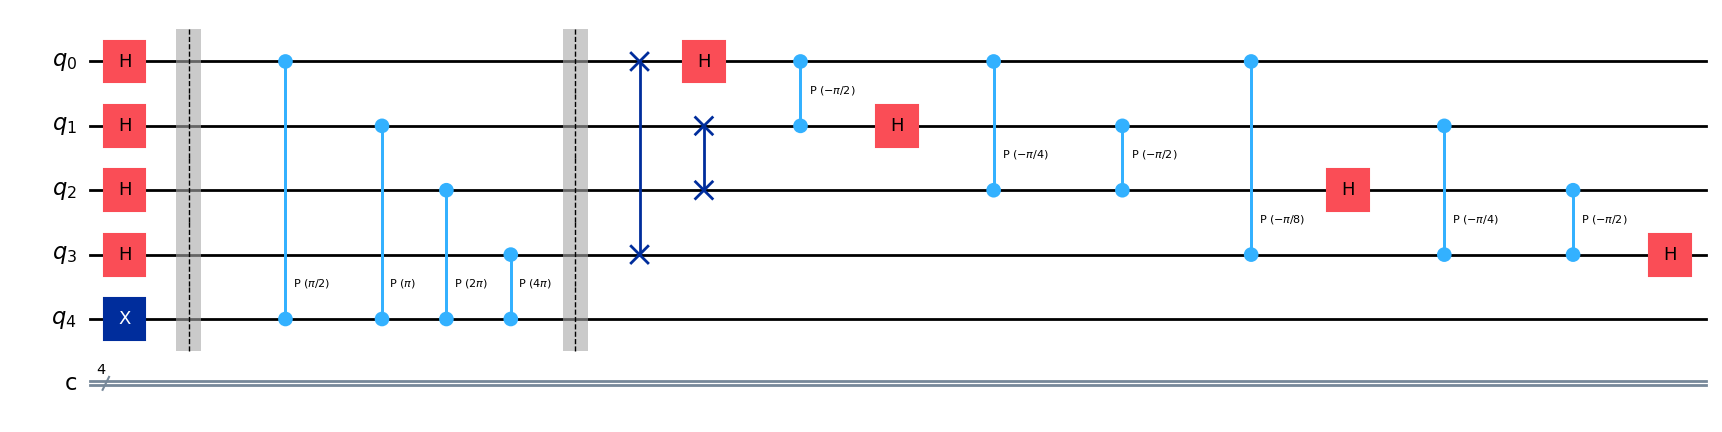

In [9]:
def create_qpe_for_viz(num_count_qubits_viz, theta_viz):
    """
    Creates QPE circuit WITHOUT measurement for visualization.
    """
    n = num_count_qubits_viz
    qc_viz = QuantumCircuit(n + 1, n)

    # Step 1: Apply Hadamard gates
    qc_viz.h(range(n))

    # Step 2: Prepare eigenstate
    qc_viz.x(n)
    qc_viz.barrier() # Separator

    # Step 3: Apply controlled unitary operations
    for qubit in range(n):
        qc_viz.cp(2 * np.pi * theta_viz * (2 ** qubit), qubit, n)

    qc_viz.barrier() # Separator

    # --- Step 4: Apply inverse QFT ---
    print("Applying Inverse QFT...")
    inverse_qft(qc_viz, n)

    return qc_viz


# Create the circuit
n_viz = 4
th_viz = 0.25
qc_to_visualize = create_qpe_for_viz(n_viz, th_viz)

# Draw the circuit with Matplotlib
print(f"Drawing circuit for n={n_viz} (before measurement):")
display(qc_to_visualize.draw('mpl'))

# ***TASK 5***

Task 5: Noise Simulation (n=3, theta=0.125)
Created a simple depolarizing noise model.
Running noisy simulation...
Running ideal simulation for comparison...
Plotting comparison:


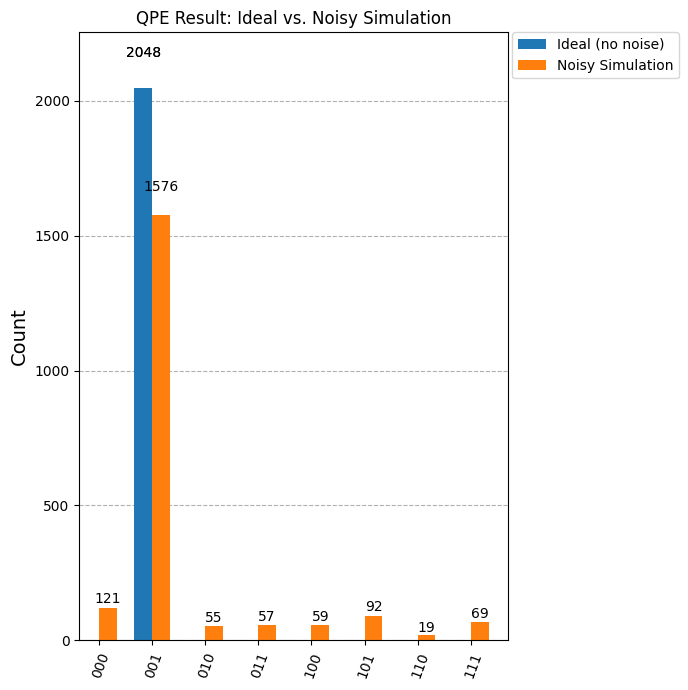

In [10]:
# Task 5: Noise Simulation
from qiskit_aer.noise import NoiseModel, depolarizing_error

def run_qpe_with_noise(num_count_qubits_noise, theta_noise):
    """Runs QPE on both an ideal and a noisy simulator for comparison."""

    print(f"Task 5: Noise Simulation (n={num_count_qubits_noise}, theta={theta_noise})")

    # --- 1. Create a simple noise model ---
    # Define error probabilities
    p_gate1 = 0.01  # 1% error on single-qubit gates
    p_gate2 = 0.05  # 5% error on two-qubit gates

    # Create depolarizing errors
    error_gate1 = depolarizing_error(p_gate1, 1)
    error_gate2 = depolarizing_error(p_gate2, 2)

    noise_model = NoiseModel()

    # Add errors to the gates used in our circuit
    # Single-qubit gates: 'h', 'x'
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    # Two-qubit gates: 'cp', 'swap' (which decomposes to 'cx')
    noise_model.add_all_qubit_quantum_error(error_gate2, ['cp', 'cx'])

    print("Created a simple depolarizing noise model.")

    # --- 2. Create simulators ---
    simulator_noisy = AerSimulator(noise_model=noise_model)
    simulator_ideal = AerSimulator() # For comparison

    # --- 3. Create and compile the circuit ---
    qc_noise = qpe_circuit(num_count_qubits_noise, "U", theta_noise)

    # Compile for both simulators
    compiled_circuit_noisy = transpile(qc_noise, simulator_noisy)
    compiled_circuit_ideal = transpile(qc_noise, simulator_ideal)

    # --- 4. Run simulations ---
    print("Running noisy simulation...")
    result_noisy = simulator_noisy.run(compiled_circuit_noisy, shots=2048).result()
    counts_noisy = result_noisy.get_counts()

    print("Running ideal simulation for comparison...")
    result_ideal = simulator_ideal.run(compiled_circuit_ideal, shots=2048).result()
    counts_ideal = result_ideal.get_counts()

    # --- 5. Plot results ---
    print("Plotting comparison:")
    legend = ['Ideal (no noise)', 'Noisy Simulation']
    display(plot_histogram(
        [counts_ideal, counts_noisy],
        legend=legend,
        figsize=(7, 7),
        title="QPE Result: Ideal vs. Noisy Simulation" # <-- Title goes here
    ))

# Run the noise simulation task
# We use the original parameters (n=3, theta=0.125)
# The ideal result should be a sharp peak at '001'
run_qpe_with_noise(num_count_qubits_noise=3, theta_noise=0.125)